In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [3]:
data_01 = pd.read_csv(f'kyphosis.csv')
data_v1 = data_01.copy()

In [5]:
data_v1.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [11]:
data_v1.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


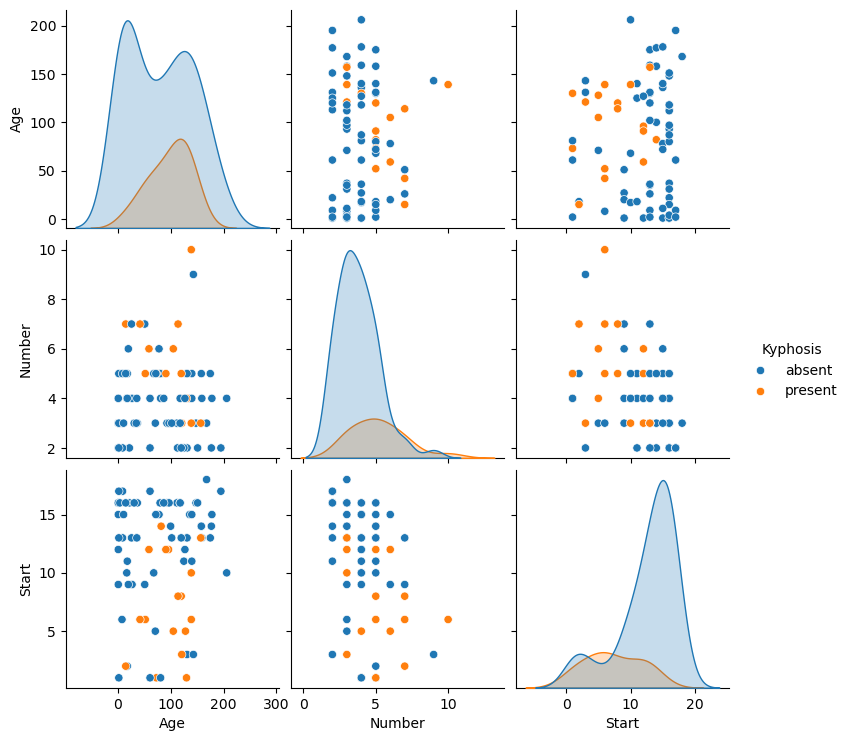

In [13]:
sns.pairplot(data_v1, hue = 'Kyphosis')

In [45]:
X = data_v1.drop(columns = ['Kyphosis'], axis = 1)
y = data_v1['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Decision Tree classifier model

In [19]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
preds = dtree.predict(X_test)

In [25]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[10  4]
 [ 2  1]]


              precision    recall  f1-score   support

      absent       0.83      0.71      0.77        14
     present       0.20      0.33      0.25         3

    accuracy                           0.65        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.72      0.65      0.68        17



# Random Forest classifier model

In [47]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [49]:
rfc_preds = rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test, rfc_preds))
print(classification_report(y_test, rfc_preds))

[[19  0]
 [ 5  1]]
              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



# Beginning a practical project from here

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
data_02 = pd.read_csv(f'loan_data.csv')
data_v2 = data_02.copy()

In [64]:
data_v2.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [66]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [68]:
data_v2.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [70]:
data_v2.describe(include = ['object'])

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


# Exploratory data analysis

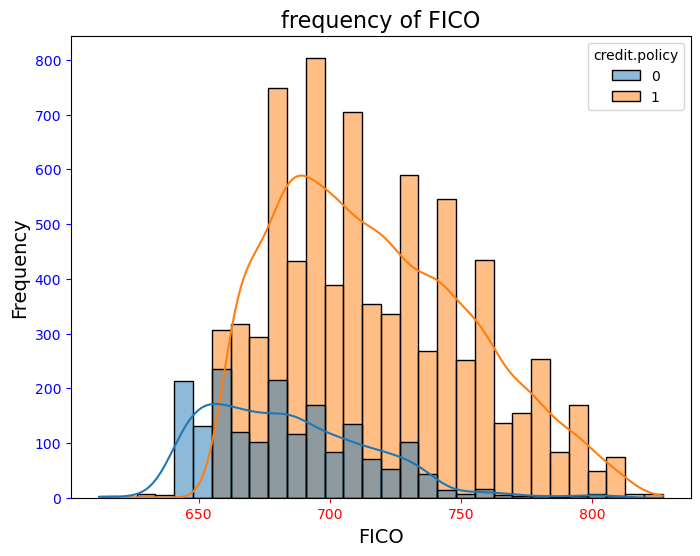

In [89]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data = data_v2, x = 'fico', y = None, bins=30, kde=True, color='skyblue', edgecolor='black', hue = 'credit.policy')

# Add labels and title
plt.title('frequency of FICO', fontsize=16)
plt.xlabel('FICO', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Change X-axis and Y-axis tick label colors
plt.tick_params(axis='x', colors='red')  # X-axis tick labels in red
plt.tick_params(axis='y', colors='blue')  # Y-axis tick labels in blue

# Enable interactivity with mpld3
plt.show()

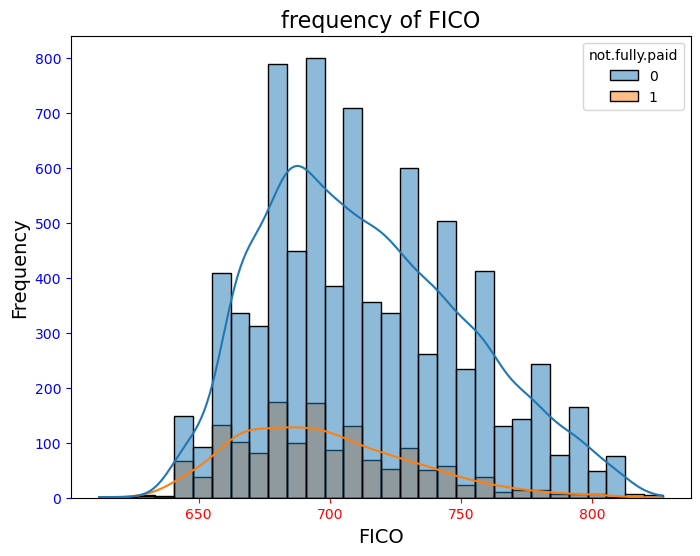

In [91]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data = data_v2, x = 'fico', y = None, bins=30, kde=True, color='skyblue', edgecolor='black', hue = 'not.fully.paid')

# Add labels and title
plt.title('frequency of FICO', fontsize=16)
plt.xlabel('FICO', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Change X-axis and Y-axis tick label colors
plt.tick_params(axis='x', colors='red')  # X-axis tick labels in red
plt.tick_params(axis='y', colors='blue')  # Y-axis tick labels in blue

# Enable interactivity with mpld3
plt.show()

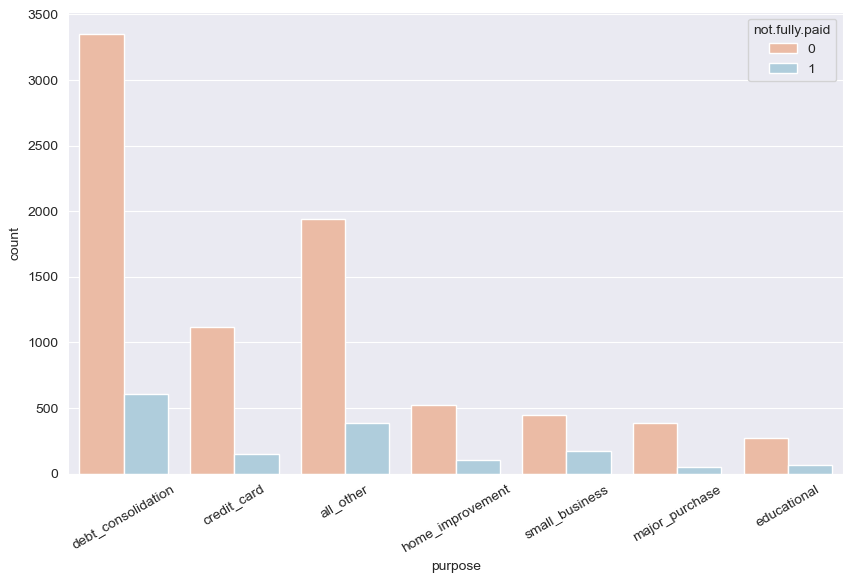

In [101]:
# Set Seaborn style
sns.set_style("darkgrid")

# Create the count plot
plt.figure(figsize=(10,6))
sns.countplot(data=data_v2, x='purpose', hue='not.fully.paid', palette="RdBu")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)

# Show the plot
plt.show()

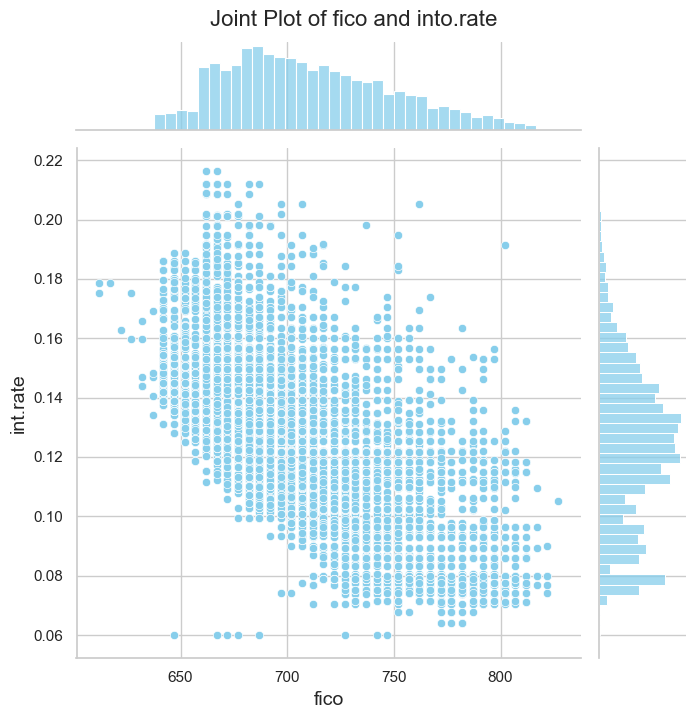

In [105]:
# Create a joint plot
sns.set(style="whitegrid")  # Set the style
joint_plot = sns.jointplot(data = data_v2, x='fico', y='int.rate', kind='scatter', color='skyblue', height=7)

# Add labels and title
joint_plot.set_axis_labels('fico', 'int.rate', fontsize=14)
joint_plot.fig.suptitle('Joint Plot of fico and into.rate', fontsize=16, y=1.02)

# Show the plot
plt.show()

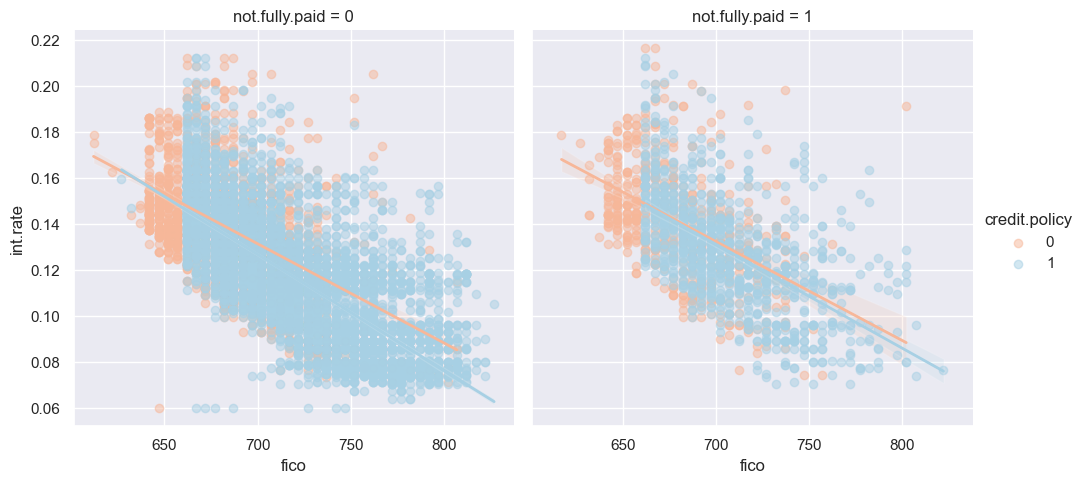

In [107]:
# Set Seaborn style
sns.set_style("darkgrid")

# Create the lmplot
sns.lmplot(data=data_v2, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', 
           palette='RdBu', scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})

# Show the plot
plt.show()

In [117]:
# Do the onehot encoding to categorical data

encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(data_v2[['purpose']])

encoded_df = pd.DataFrame(
    encoded_data,
    columns = encoder.get_feature_names_out(['purpose'])
)

data_03 = pd.concat([data_v2, encoded_df], axis = 1)

data_03 = data_03.drop(columns = ['purpose'], axis = 1)

data_v3 = data_03.copy()

data_v3.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [119]:
X = data_v3.drop(columns = ['not.fully.paid'], axis = 1)
y = data_v3['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [125]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)

preds = DTree.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[1972  459]
 [ 332  111]]


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.19      0.25      0.22       443

    accuracy                           0.72      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.72      0.74      2874



In [127]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

preds = RFC.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[2424    7]
 [ 433   10]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [129]:
data_v3['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64